# Choosing time period for LES

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cf_xarray
import dcpy
import pump
import xarray as xr

In [3]:
import distributed
import ncar_jobqueue

cluster = ncar_jobqueue.NCARCluster()  #distributed.LocalCluster(n_workers=12, threads_per_worker=1)
cluster.scale(12)
client = distributed.Client(cluster)
client

Client Scheduler: tcp://10.12.205.27:37601 Dashboard: https://jupyterhub.ucar.edu/dav/user/dcherian/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
import dask

dask.config.set(scheduler=client)

from dask.cache import Cache
cache = Cache(2e9)  # Leverage two gigabytes of memory
cache.register() 

In [4]:
dirname = "/glade/p/cgd/oce/people/dwhitt/TPOS/tpos20/OUT/"

avg = pump.model.model.read_roms_dataset(
    f"{dirname}/ocean_avg_tpos20_3_d2*.nc", xi=10, eta=None, s=None, ocean_time=20
)
avg

/glade/u/home/dcherian/pump/pump/model/model.py:101: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds["ocean_time"] = ds.indexes["ocean_time"].to_datetimeindex()


<xarray.Dataset>
Dimensions:        (boundary: 4, lat_psi: 480, lat_rho: 481, lat_u: 481, lat_v: 480, lon_psi: 1500, lon_rho: 1501, lon_u: 1500, lon_v: 1501, ocean_time: 420, s_rho: 50, s_w: 51, tracer: 2)
Coordinates:
  * lat_v          (lat_v) float64 -11.97 -11.92 -11.87 ... 11.87 11.92 11.97
    Tobc_out       (boundary, tracer) float64 dask.array<chunksize=(4, 2), meta=np.ndarray>
    dstart         object 0027-09-02 00:00:00
    ndefAVG        int32 0
    Cs_w           (s_w) float64 dask.array<chunksize=(51,), meta=np.ndarray>
    LtracerCLM     (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    LwSrc          int32 0
    ntsAVG         int32 1
    Tnudg          (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    LnudgeTCLM     (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    theta_b        float64 0.0
    Vstretching    int32 1
    LuvSponge      int32 0
    ndefHIS        int32 0
    mask_u         (lat_u, lon_u) float64 dask.array<chunksize=(481, 10), meta=np.ndarray>
    ndtfast        int32 20
    FSobc_out      (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    rdrg2          float64 0.003
    Falpha         float64 2.0
    mask_rho       (lat_rho, lon_rho) float64 dask.array<chunksize=(481, 10), meta=np.ndarray>
    nAVG           int32 180
    ntsDIA         int32 1
    nl_tnu4        (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    nRST           int32 3600
    Zos            float64 0.02
  * lon_v          (lon_v) float64 -170.0 -170.0 -169.9 ... -95.1 -95.05 -95.0
    pm             (lat_rho, lon_rho) float64 dask.array<chunksize=(481, 10), meta=np.ndarray>
    Lm3PSH         int32 0
    Akt_bak        (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * lat_rho        (lat_rho) float64 -12.0 -11.95 -11.9 ... 11.9 11.95 12.0
    hc             float64 75.0
    ndefDIA        int32 0
    mask_psi       (lat_psi, lon_psi) float64 dask.array<chunksize=(480, 10), meta=np.ndarray>
    ntimes         int32 25201
    LuvSrc         int32 0
  * lat_psi        (lat_psi) float64 -11.97 -11.92 -11.87 ... 11.87 11.92 11.97
    Lm2CLM         int32 0
    h              (lat_rho, lon_rho) float64 dask.array<chunksize=(481, 10), meta=np.ndarray>
    angle          (lat_rho, lon_rho) float64 dask.array<chunksize=(481, 10), meta=np.ndarray>
    Tobc_in        (boundary, tracer) float64 dask.array<chunksize=(4, 2), meta=np.ndarray>
    gamma2         float64 1.0
  * lat_u          (lat_u) float64 -12.0 -11.95 -11.9 -11.85 ... 11.9 11.95 12.0
    LtracerPSH     (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
    M2nudg         float64 0.0
    M3nudg         float64 1.0
    grid           int32 1
    nSTA           int32 30
    M2obc_in       (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    dtfast         float64 6.0
    Cs_r           (s_rho) float64 dask.array<chunksize=(50,), meta=np.ndarray>
    f              (lat_rho, lon_rho) float64 dask.array<chunksize=(481, 10), meta=np.ndarray>
  * lon_rho        (lon_rho) float64 -170.0 -170.0 -169.9 ... -95.1 -95.05 -95.0
    dt             float64 120.0
    el             float64 2.674e+06
    theta_s        float64 5.0
    spherical      int32 1
    nl_visc4       float64 1.24e+09
    Fbeta          float64 4.0
    Akv_bak        float64 1e-05
    pn             (lat_rho, lon_rho) float64 dask.array<chunksize=(481, 10), meta=np.ndarray>
    Fgamma         float64 0.284
    M3obc_in       (boundary) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    nHIS           int32 3600
    LtracerSponge  (tracer) int32 dask.array<chunksize=(2,), meta=np.ndarray>
  * lon_psi        (lon_psi) float64 -170.0 -169.9 -169.9 ... -95.07 -95.02
    LsshCLM        int32 0
    xl             float64 8.163e+06
    LnudgeM2CLM    int32 0
  * lon_u          (lon_u) float64 -170.0 -169.9 -169.9 ... -95.12 -95.07 -95.02
    Tcline         float64 75.0
    mask_v         (lat_v, lon_v) float6

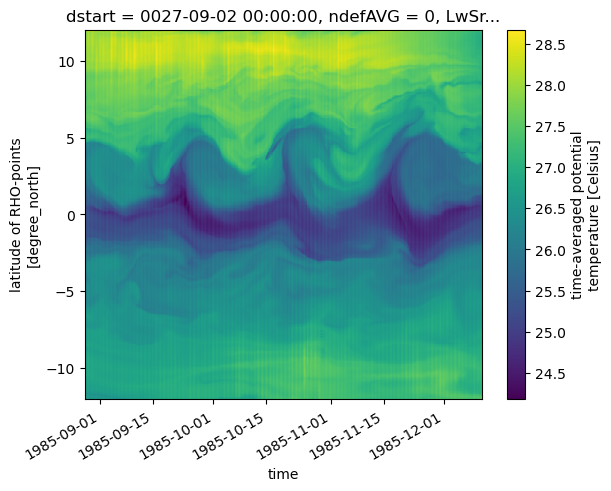

In [5]:
%matplotlib inline


avg.temp.isel(s_rho=-1).sel(lon_rho=-140, method="nearest").plot(x="ocean_time")

In [6]:
def subsetter(ds):
    return ds.cf.sel(lon_rho=-140, method="nearest")

subset = avg[["AKt", "Hsbl", "temp"]].pipe(subsetter).compute()

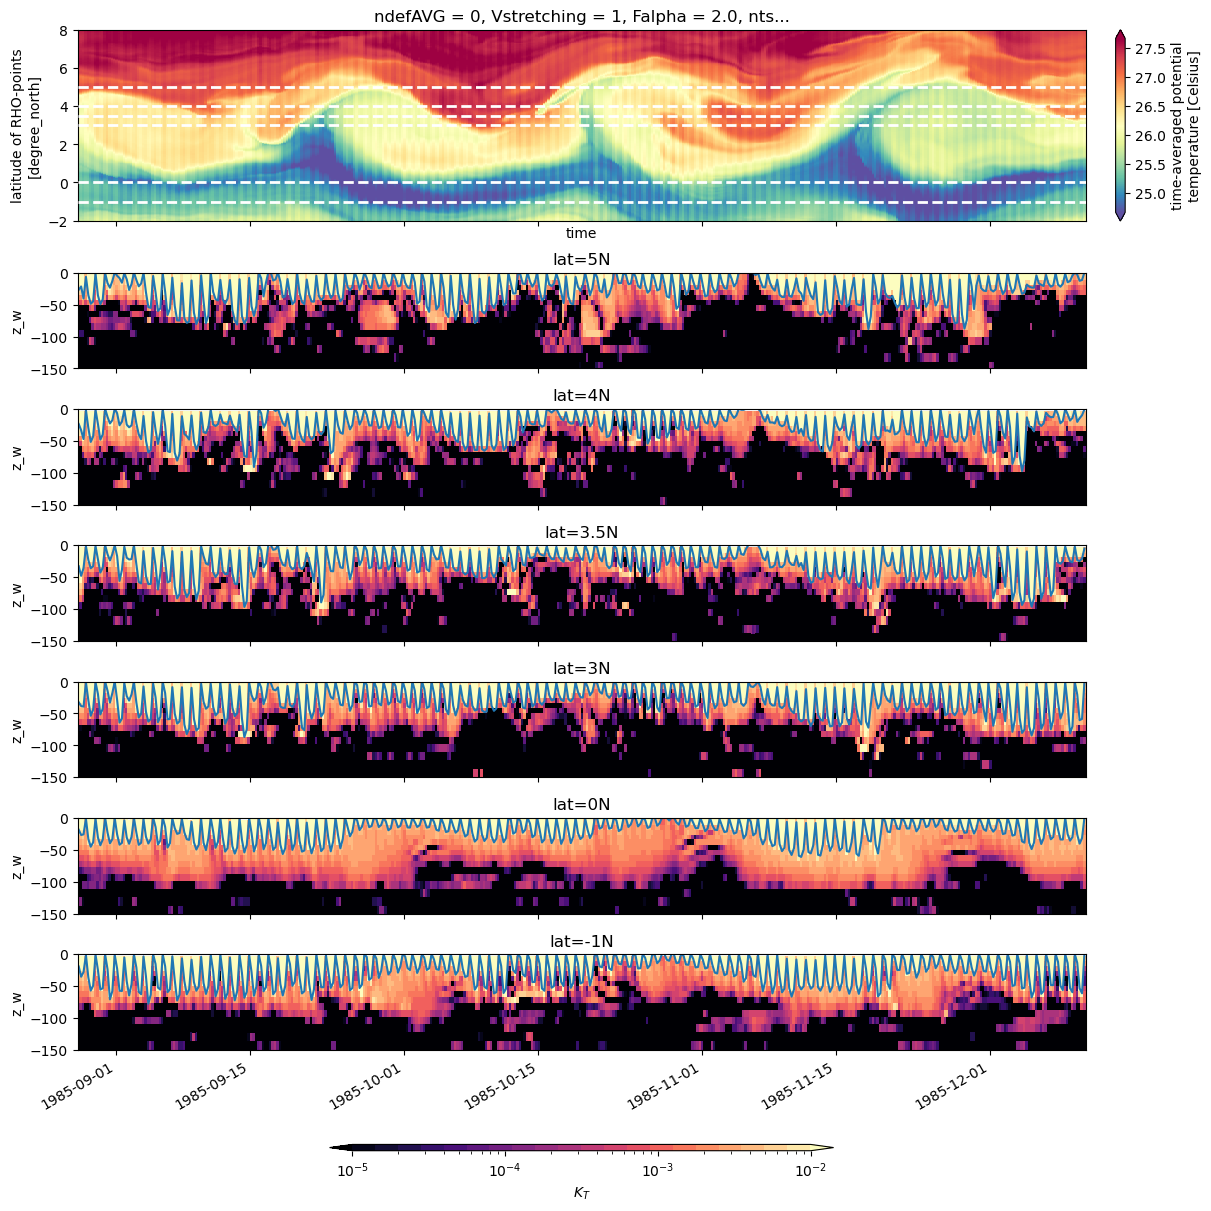

In [8]:
%matplotlib inline

lats = [-1, 0, 3, 3.5, 4, 5]

f, ax = plt.subplots(
    len(lats) + 1,
    1,
    sharex=True,
    constrained_layout=True,
    gridspec_kw={"height_ratios": [2,] + len(lats) * [1,]},
)

subset.temp.isel(s_rho=-1).sel(lat_rho=slice(-2, 8)).plot(
    x="ocean_time", ax=ax[0], robust=True, cmap=mpl.cm.Spectral_r
)
dcpy.plots.liney(lats, color="w", zorder=10, lw=2, ax=ax[0])

for lat, axx in zip(reversed(lats), ax[1:]):

    hdl = subset.AKt.sel(lat_rho=lat, method="nearest").plot(
        y="z_w",
        x="ocean_time",
        ylim=(-150, 0),
        vmin=1e-5,
        vmax=1e-2,
        levels=21,
        cmap=mpl.cm.magma,
        norm=mpl.colors.LogNorm(),
        ax=axx,
        add_colorbar=False,
    )

    axx.set_title(f"lat={lat}N")
    axx.set_xlabel("")

    subset.Hsbl.sel(lat_rho=lat, method="nearest").plot.line(
        x="ocean_time", ax=axx, _labels=False
    )
    
    
f.colorbar(hdl, ax=ax, shrink=0.5, aspect=40, orientation="horizontal", label="$K_T$")
f.set_size_inches((12, 12))